# Imports

In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Providing Data

In [14]:
data = load_breast_cancer()

In [15]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
N, D = X_train.shape

In [22]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

# Define Neural Network

In [23]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [24]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# Training

In [27]:
n_epochs = 100

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  optimizer.zero_grad()
  
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  loss.backward()
  optimizer.step()

  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
  if (it + 1) % 10 == 0:
    print(f'Epoch {it + 1}/{n_epochs}, Train loss:{loss.item():.4}, Test loss:{loss_test.item():.4}')



Epoch 10/100, Train loss:0.3253, Test loss:0.3119
Epoch 20/100, Train loss:0.3124, Test loss:0.2999
Epoch 30/100, Train loss:0.3006, Test loss:0.2891
Epoch 40/100, Train loss:0.2897, Test loss:0.2793
Epoch 50/100, Train loss:0.2798, Test loss:0.2703
Epoch 60/100, Train loss:0.2706, Test loss:0.2622
Epoch 70/100, Train loss:0.2621, Test loss:0.2546
Epoch 80/100, Train loss:0.2542, Test loss:0.2477
Epoch 90/100, Train loss:0.2468, Test loss:0.2412
Epoch 100/100, Train loss:0.2399, Test loss:0.2352


# Plotting the Loss

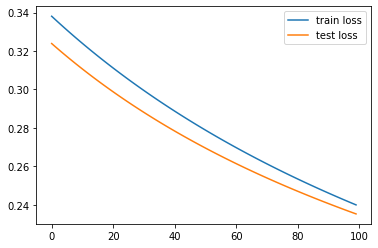

In [32]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

# Accuracy

In [31]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(p_train == y_train.numpy())

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(p_test == y_test.numpy())

  print(train_acc, test_acc)

0.945054945054945 0.9736842105263158
